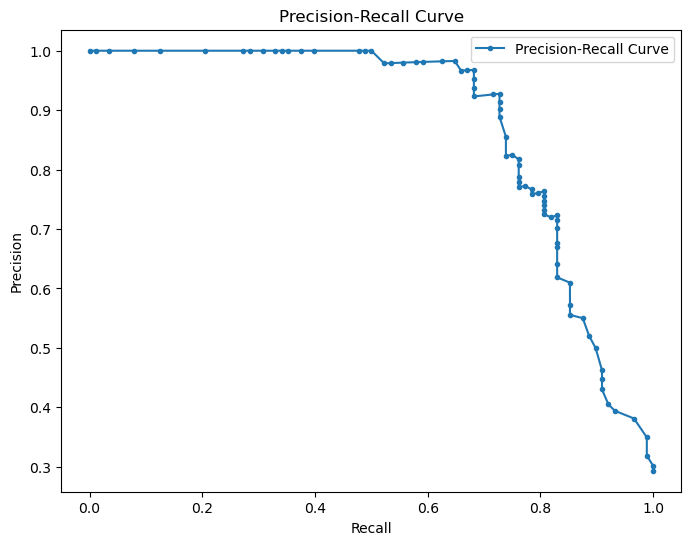

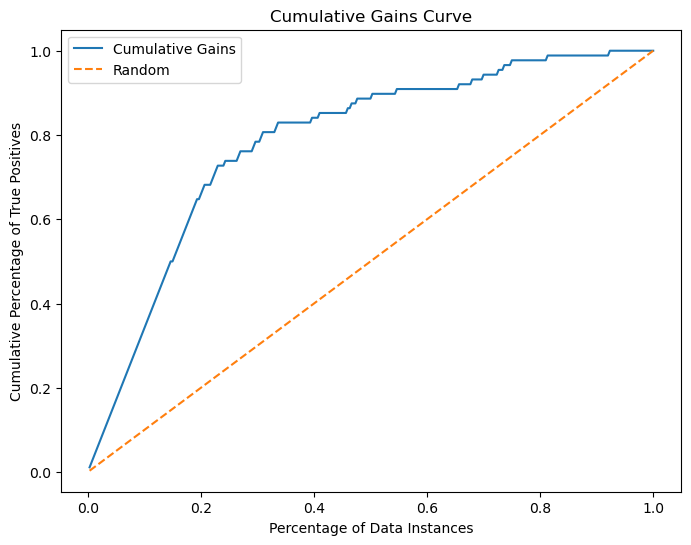

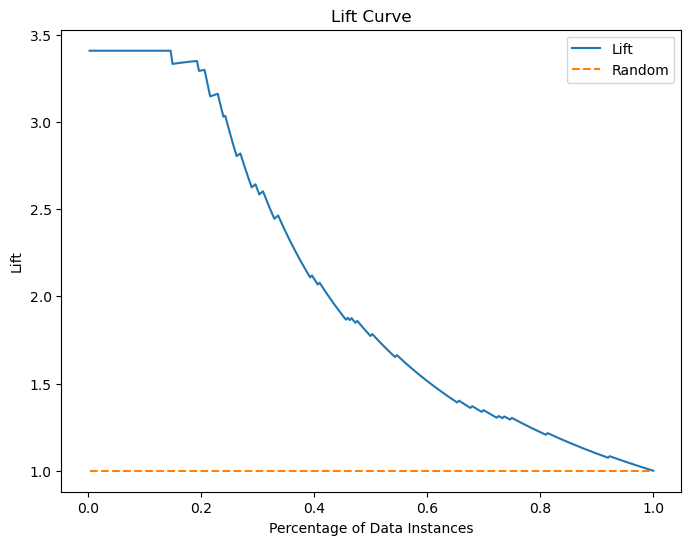

In [ ]:
#Implementations of Precision recall curve, Cumulative gains and Lift curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


X, y = make_classification(n_samples=1000, n_features=20, random_state=42, weights=[0.7, 0.3])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_probs = clf.predict_proba(X_test)[:, 1]  
y_pred = clf.predict(X_test)


precision, recall, thresholds = precision_recall_curve(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


def plot_cumulative_gains(y_true, y_prob):
    
    sorted_indices = np.argsort(y_prob)[::-1]
    sorted_y = y_true[sorted_indices]
    
  
    cum_gains = np.cumsum(sorted_y) / np.sum(sorted_y)
    x = np.arange(1, len(sorted_y) + 1) / len(sorted_y)

   
    plt.figure(figsize=(8, 6))
    plt.plot(x, cum_gains, label="Cumulative Gains")
    plt.plot(x, x, linestyle="--", label="Random")
    plt.xlabel("Percentage of Data Instances")
    plt.ylabel("Cumulative Percentage of True Positives")
    plt.title("Cumulative Gains Curve")
    plt.legend()
    plt.show()

plot_cumulative_gains(y_test, y_probs)


def plot_lift_curve(y_true, y_prob):
    
    sorted_indices = np.argsort(y_prob)[::-1]
    sorted_y = y_true[sorted_indices]
    
    
    lift = np.cumsum(sorted_y) / (np.arange(1, len(sorted_y) + 1))
    x = np.arange(1, len(sorted_y) + 1) / len(sorted_y)
    baseline = np.sum(sorted_y) / len(sorted_y)

    
    plt.figure(figsize=(8, 6))
    plt.plot(x, lift / baseline, label="Lift")
    plt.plot(x, np.ones_like(x), linestyle="--", label="Random")
    plt.xlabel("Percentage of Data Instances")
    plt.ylabel("Lift")
    plt.title("Lift Curve")
    plt.legend()
    plt.show()

plot_lift_curve(y_test, y_probs)

